In [ ]:
# basic numpy arrays

import numpy as np

nu_range = range(0,10), range(1,11)

number_set = np.array(nu_range)

number_set.fill(3)

zero_set = np.zeros_like(number_set)

zero_set

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [60]:
# numpy dimensions and referecnes

array3d = np.array(
    [[[1, 2, 3],
    [4, 5, 6]],
    [[10, 2, 3],
    [4, 50, 6]]]
)

# we can assign subsections to another object which is still linked instead of copied
array_sub = array3d[0, : ,1] # note the indexing for 3d array is each layer

array_sub[:] = 999 # don't forget we must use square brackets 

array3d


# to copy we would use 'array3d.copy()'



array([[[  1, 999,   3],
        [  4, 999,   6]],

       [[ 10,   2,   3],
        [  4,  50,   6]]])

In [ ]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [12, -4], [3, 4]])

chosen_names = (names == "Bob") | (names == "Will")

data[chosen_names, 1]

# in general indexing in numpy is very similar to indexing in base R


array([7, 6, 0, 2])

In [ ]:
# fancy indexing

arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

arr[[0, 2, 4], [1, 0, -1]] = -999

arr

# note when fancy indexing this will automatically create a copy, unlike the slicing before

chosen_subset = arr[[1, 2], [2, 1]]
chosen_subset[:] = -888
arr # array unchanged!

array([[   0., -999.,    0.,    0.],
       [   1.,    1.,    1.,    1.],
       [-999.,    2.,    2.,    2.],
       [   3.,    3.,    3.,    3.],
       [   4.,    4.,    4., -999.],
       [   5.,    5.,    5.,    5.],
       [   6.,    6.,    6.,    6.],
       [   7.,    7.,    7.,    7.]])

In [ ]:
# reshape

np.array(range(10)).reshape(5,2)


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [119]:
arr.swapaxes(0, 1)
arr

array([[   0., -999.,    0.,    0.],
       [   1.,    1.,    1.,    1.],
       [-999.,    2.,    2.,    2.],
       [   3.,    3.,    3.,    3.],
       [   4.,    4.,    4., -999.],
       [   5.,    5.,    5.,    5.],
       [   6.,    6.,    6.,    6.],
       [   7.,    7.,    7.,    7.]])

In [131]:
np.random.shuffle(arr)
arr

array([[   5.,    5.,    5.,    5.],
       [   4.,    4.,    4., -999.],
       [-999.,    2.,    2.,    2.],
       [   3.,    3.,    3.,    3.],
       [   0., -999.,    0.,    0.],
       [   7.,    7.,    7.,    7.],
       [   6.,    6.,    6.,    6.],
       [   1.,    1.,    1.,    1.]])

In [ ]:
# vctorised logic

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([3.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

cond.all()
cond.any()

combined_arr = np.where( # <-- this is essntially dplyr::if_else()
    cond,
    xarr,
    yarr
)

np.minimum(np.maximum(combined_arr, 1.25), 2.25)


xarr[yarr.argsort()] # arrange the x values in order of the y values


AttributeError: 'numpy.bool' object has no attribute 'print'

In [ ]:
# fitting a linear equation

import stats

x_values = np.array([1, 2, 3, 4])
y_values = np.random.normal(0, 1, 4) - x_values

y_values
c, m = stats.linr(x_values, y_values)

m

-0.37497963815215807

array([-20.54349852, -18.93256152])

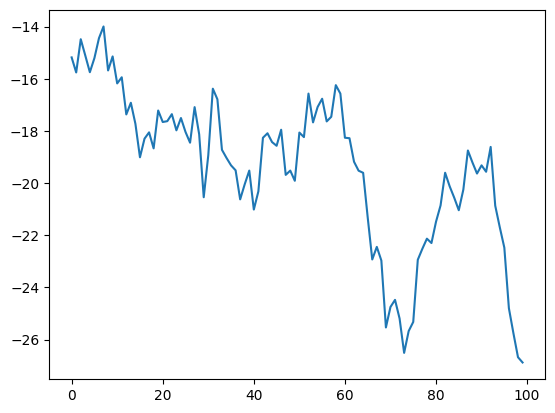

In [215]:
# making a random walk

import matplotlib.pyplot  as plt

r_gen = np.random.default_rng(42)

step = r_gen.standard_normal(1000)

walk = step.cumsum()

walk.min()
walk.max()

plt.plot(walk[600:700])

# first time dipped outside +-20...
(abs(walk) > 20).argmax()

walk[629:631]

In [ ]:
# doing many random walks at the same time

no_walks = 75
no_steps = 1000

rng = np.random.default_rng(seed=1)

steps = rng.integers(-1, 2, size = (no_walks, no_steps))

walks = steps.cumsum(axis = 1)

over_20 = (abs(walks) > 20).any(axis=1)
(abs(walks[over_20]) > 20).argmax(axis = 1).mean()


np.float64(379.135593220339)